In [1]:
# 1.1

import math

class Trigonometric:
    @staticmethod
    def angle_to_radian(x : float) -> float:
        return math.pi*x/180

    @staticmethod
    def sin(x : float) -> float:
        return math.sin(x)

    @staticmethod
    def cos(x : float) -> float:
        return math.cos(x)

    @staticmethod
    def tan(x : float) -> float:
        return math.tan(x)

    @staticmethod
    def arcsin(x : float) -> float:
        return math.asin(x)
    
    @staticmethod
    def arccos(x : float) -> float:
        return math.acos(x)
    
    @staticmethod
    def arctan(x : float) -> float:
        return math.atan(x)

In [27]:
# 1.2.1

class Tree:
    next : list

    def __init__(self, kids, next=None):
        self.kids = self.val = kids
        self.next = next

    def __str__(self) -> str:
        return str(self.val)

t = Tree("a", [Tree("b", [Tree("d"), Tree("e")]), Tree("c", [Tree("f"),])])

print(t, '\n', [t.next[0].val, [i.val for i in t.next[0].next]], "\t", [t.next[1].val, [i.val for i in t.next[1].next]])

a 
 ['b', ['d', 'e']] 	 ['c', ['f']]


In [54]:
# 1.2.2

class Tree:

    left : Tree
    right : Tree
    data : int

    def	__init__(self, data): 
        self.left = None
        self.right = None
        self.data = data

    def PrintTree(self):
        print(self.str_print())

    def add(self, x):
        if x < self.data:
            if self.left is None:
                self.left = Tree(x)
            else:
                self.left.add(x)
        elif x > self.data:
            if self.right is None:
                self.right = Tree(x)
            else:
                self.right.add(x)
        else:
            raise(ValueError)

    def str_print(self) -> str:
        if self.left is not None and self.right is not None:
            return f"{self.data} - {[self.left.str_print(), self.right.str_print()]}"
        elif self.right is not None:
            return f"{self.data} - {[None, self.right.str_print()]}"
        elif self.left is not None:
            return f"{self.data} - {[self.left.str_print(), None]}"
        else:
            return f"{self.data}"

root = Tree(20)
root.add(14)
root.add(25)
root.add(10)
root.add(30)
root.PrintTree()


20 - ["14 - ['10', None]", "25 - [None, '30']"]


[[1 0]
 [0 1]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         1

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2



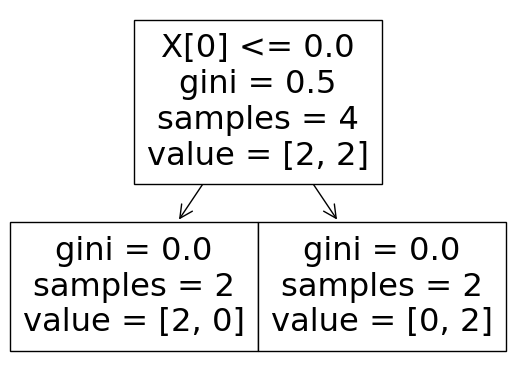

In [78]:
# 1.3

from sklearn.model_selection import train_test_split
import numpy as np

x = np.array([[-1, -1], [-2, -4], [-3, -2], [1, 1], [2, 1], [3, 2]])
target = np.array([0, 0, 0, 1, 1, 1])

x_train, x_test, y_train, y_test = train_test_split(x, target, test_size = 0.20)
x_train.shape, x_test.shape 
y_train.shape, y_test.shape

from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier.fit(x_train, y_train)

from sklearn import tree
tree.plot_tree(classifier)

y_pred = classifier.predict(x_test)

from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Dataset Sizes :  (48, 4) (48,)


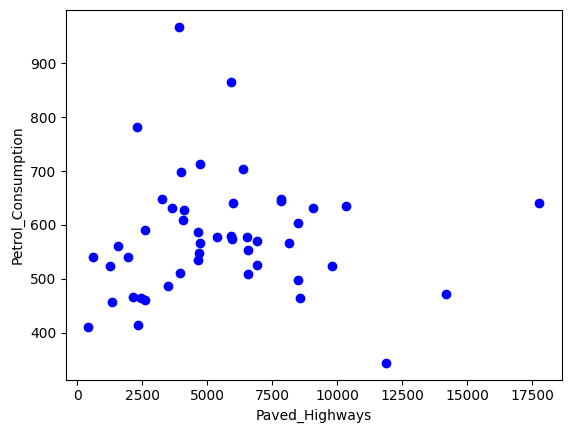

5065.0
50.8
8.807657576304857


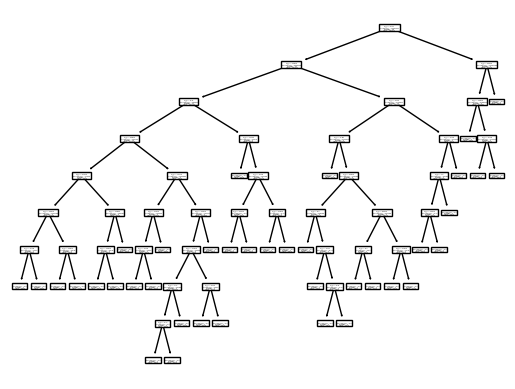

In [92]:
# 1.4

from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

csv_file = pd.read_csv('https://raw.githubusercontent.com/likarajo/petrol_consumption/master/data/petrol_consumption.csv')
csv_file.shape
digits = csv_file.to_numpy()
X_digits, Y_digits = np.array([[float(i) for i in data if i != data[-1]] for data in digits]), np.array([float(data[-1]) for data in digits])
print('Dataset Sizes : ', X_digits.shape, Y_digits.shape)

plt.scatter(csv_file['Paved_Highways'], csv_file['Petrol_Consumption'], color = 'b', label = '')
plt.xlabel("Paved_Highways")

plt.ylabel("Petrol_Consumption")

plt.show()

x_train, x_test, y_train, y_test = train_test_split(X_digits, Y_digits, test_size = 0.20, random_state=0)
x_train.shape, x_test.shape 
y_train.shape, y_test.shape

from sklearn.tree import DecisionTreeRegressor
classifier = DecisionTreeRegressor()
classifier.fit(x_train, y_train)

from sklearn import tree
tree.plot_tree(classifier)

y_pred = classifier.predict(x_test)

from sklearn import metrics
print(metrics.mean_squared_error(y_test, y_pred))
print(metrics.mean_absolute_error(y_test, y_pred))
print(metrics.mean_absolute_error(y_test, y_pred) / np.average(Y_digits) * 100)
